## This notebooks fits the cnn on permuted labeles for task 2.5

In [3]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import torch.nn as nn
from torchinfo import summary
import torchvision.transforms as transforms
from torchvision.transforms import Lambda

In [2]:
from torchvision.models import VGG16_Weights
model = torchvision.models.vgg16(weights=VGG16_Weights.DEFAULT)

In [3]:
trans_wo_norm = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor()
])

dataset0_wo_norm = torchvision.datasets.ImageFolder("archive/chest_xray/chest_xray/train", transform=trans_wo_norm)
dataset1_wo_norm = torchvision.datasets.ImageFolder("archive/chest_xray/chest_xray/test", transform=trans_wo_norm)
dataset2_wo_norm = torchvision.datasets.ImageFolder("archive/chest_xray/chest_xray/val", transform=trans_wo_norm)

In [4]:
mean0 = torch.zeros(3)
std0 = torch.zeros(3)
for img, _ in dataset0_wo_norm:
    mean0 += img.mean(dim=(1, 2))
    std0 += img.std(dim=(1, 2))

mean0 /= len(dataset0_wo_norm)
std0 /= len(dataset0_wo_norm)

print("Mean:", mean0)
print("Standard deviation:", std0)

Mean: tensor([0.5832, 0.5832, 0.5832])
Standard deviation: tensor([0.1413, 0.1413, 0.1413])


In [5]:
mean1 = torch.zeros(3)
std1 = torch.zeros(3)
for img, _ in dataset1_wo_norm:
    mean1 += img.mean(dim=(1, 2))
    std1 += img.std(dim=(1, 2))

mean1 /= len(dataset1_wo_norm)
std1 /= len(dataset1_wo_norm)

print("Mean:", mean1)
print("Standard deviation:", std1)

# Mean: tensor([0.5763, 0.5763, 0.5763])
# Standard deviation: tensor([0.1453, 0.1453, 0.1453])

Mean: tensor([0.5763, 0.5763, 0.5763])
Standard deviation: tensor([0.1453, 0.1453, 0.1453])


In [6]:
mean2 = torch.zeros(3)
std2 = torch.zeros(3)
for img, _ in dataset2_wo_norm:
    mean2 += img.mean(dim=(1, 2))
    std2 += img.std(dim=(1, 2))

mean2 /= len(dataset2_wo_norm)
std2 /= len(dataset2_wo_norm)

print("Mean:", mean2)
print("Standard deviation:", std2)

# Mean: tensor([0.6020, 0.6020, 0.6020])
# Standard deviation: tensor([0.1401, 0.1401, 0.1401])

Mean: tensor([0.6020, 0.6020, 0.6020])
Standard deviation: tensor([0.1401, 0.1401, 0.1401])


In [8]:
mean0 =torch.tensor([0.5832, 0.5832, 0.5832])
std0  =torch.tensor([0.1413, 0.1413, 0.1413])
mean1 =torch.tensor([0.5763, 0.5763, 0.5763])
std1  =torch.tensor([0.1453, 0.1453, 0.1453])
mean2 =torch.tensor([0.6020, 0.6020, 0.6020])
std2  =torch.tensor([0.1401, 0.1401, 0.1401])

In [9]:
std_normalise_0 = transforms.Normalize(
    mean=mean0,
    std=std0
)
std_normalise_1 = transforms.Normalize(
    mean=mean1,
    std=std1
)
std_normalise_2 = transforms.Normalize(
    mean=mean2,
    std=std2
)

trans0 = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.Grayscale(num_output_channels=3),
        transforms.ToTensor(),
        std_normalise_0
])
trans1 = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.Grayscale(num_output_channels=3),
        transforms.ToTensor(),
        std_normalise_1
])
trans2 = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.Grayscale(num_output_channels=3),
        transforms.ToTensor(),
        std_normalise_2
])

In [9]:
dataset_0 = torchvision.datasets.ImageFolder("archive/chest_xray/chest_xray/train", transform=trans0)
dataset_1 = torchvision.datasets.ImageFolder("archive/chest_xray/chest_xray/test", transform=trans1)
dataset_2 = torchvision.datasets.ImageFolder("archive/chest_xray/chest_xray/val", transform=trans2)

In [10]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

print('Doing computations on device = {}'.format(device))

model.to(device)

Doing computations on device = cuda


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [11]:
model.classifier = nn.Sequential(
    torch.nn.Linear(25088,4096),
    torch.nn.ReLU(),
    torch.nn.Dropout(0.5, inplace = False),
    torch.nn.Linear(4096,1000),
    torch.nn.ReLU(),
    torch.nn.Dropout(0.5, inplace = False),
    torch.nn.Linear(1000,2)
).to(device)

In [12]:
# now we define train and validation set randomly as the validation set provided is too small for meaningful results
trainset, testset = torch.utils.data.random_split(dataset_0, [4999, len(dataset_0) - 4999])


### Permuted lables train data

In [13]:
lables = np.array([lable for _, lable in trainset.dataset.imgs])

In [14]:
np.random.seed(0)
lables = np.random.permutation(lables)

In [15]:
for i, (_,lable) in enumerate(trainset.dataset.imgs):
    trainset.dataset.imgs[i] = (trainset.dataset.imgs[i][0], lables[i])

## Define data loaders

In [16]:
train_loader = torch.utils.data.DataLoader(trainset,batch_size=32)
test_loader  = torch.utils.data.DataLoader(testset,batch_size=32)

In [17]:
def train_long(net,train_loader,test_loader,epochs=5,lr=0.001,optimizer=None,loss_fn = nn.NLLLoss(),print_freq=10):
    optimizer = optimizer or torch.optim.Adam(net.parameters(),lr=lr)
    for epoch in range(epochs):
        net.train()
        total_loss,acc,count = 0,0,0
        for i, (features,labels) in enumerate(train_loader):
            lbls = labels.long().to(default_device)
            optimizer.zero_grad()
            out = net(features.to(default_device))
            loss = loss_fn(out,lbls)
            loss.backward()
            optimizer.step()
            total_loss+=loss
            _,predicted = torch.max(out,1)
            acc+=(predicted==lbls).sum()
            count+=len(labels)
            if i%print_freq==0:
                print("Epoch {}, minibatch {}: train acc = {}, train loss = {}".format(epoch,i,acc.item()/count,total_loss.item()/count))
        vl,va = validate(net,test_loader,loss_fn)
        print("Epoch {} done, validation acc = {}, validation loss = {}".format(epoch,va,vl))


In [18]:
def validate(net, dataloader,loss_fn=nn.NLLLoss()):
    net.eval()
    count,acc,loss = 0,0,0
    with torch.no_grad():
        for features,labels in dataloader:
            
            lbls = labels.long().to(default_device)
            out = net(features.to(default_device))
            loss += loss_fn(out,lbls) 
            pred = torch.max(out,1)[1]
            acc += (pred==lbls).sum()
            count += len(labels)
    return loss.item()/count, acc.item()/count

In [19]:
for param in model.features.parameters():
    param.requires_grad = False

In [20]:
default_device = device
train_long(model,train_loader,test_loader,lr=0.00005,loss_fn=torch.nn.CrossEntropyLoss(),epochs=4,print_freq=90)

Epoch 0, minibatch 0: train acc = 0.4375, train loss = 0.021872468292713165
Epoch 0, minibatch 90: train acc = 0.7366071428571429, train loss = 0.01886152828132713
Epoch 0 done, validation acc = 0.7511520737327189, validation loss = 0.01841489510602116
Epoch 1, minibatch 0: train acc = 0.78125, train loss = 0.016169628128409386
Epoch 1, minibatch 90: train acc = 0.7421016483516484, train loss = 0.018096833438663692
Epoch 1 done, validation acc = 0.7465437788018433, validation loss = 0.018533801153508198
Epoch 2, minibatch 0: train acc = 0.75, train loss = 0.016182364895939827
Epoch 2, minibatch 90: train acc = 0.7421016483516484, train loss = 0.017601776909042192
Epoch 2 done, validation acc = 0.7603686635944701, validation loss = 0.018234041978686635
Epoch 3, minibatch 0: train acc = 0.84375, train loss = 0.015077903866767883
Epoch 3, minibatch 90: train acc = 0.7561813186813187, train loss = 0.016589298353090393
Epoch 3 done, validation acc = 0.728110599078341, validation loss = 0.01

In [21]:
torch.save(model,'models/model_permuted.pth')

## Plot grad cam for permuted models

In [4]:
from torch.utils import data
import torchvision

from models.grad_cam import CNN_grad_cam, display_datasets_heatmap


In [5]:
model = torch.load('models/model_permuted.pth')

In [10]:
data_for_grad_cam = torchvision.datasets.ImageFolder('archive/chest_xray/plot_grad_cam', transform=trans0)
dataloader_grad_cam = data.DataLoader(data_for_grad_cam, shuffle=False, batch_size=1)

In [11]:
grad_cam_model = CNN_grad_cam(model)

1 0
1 0
1 0
0 0
1 0
1 1
1 1
1 1
0 1
0 1


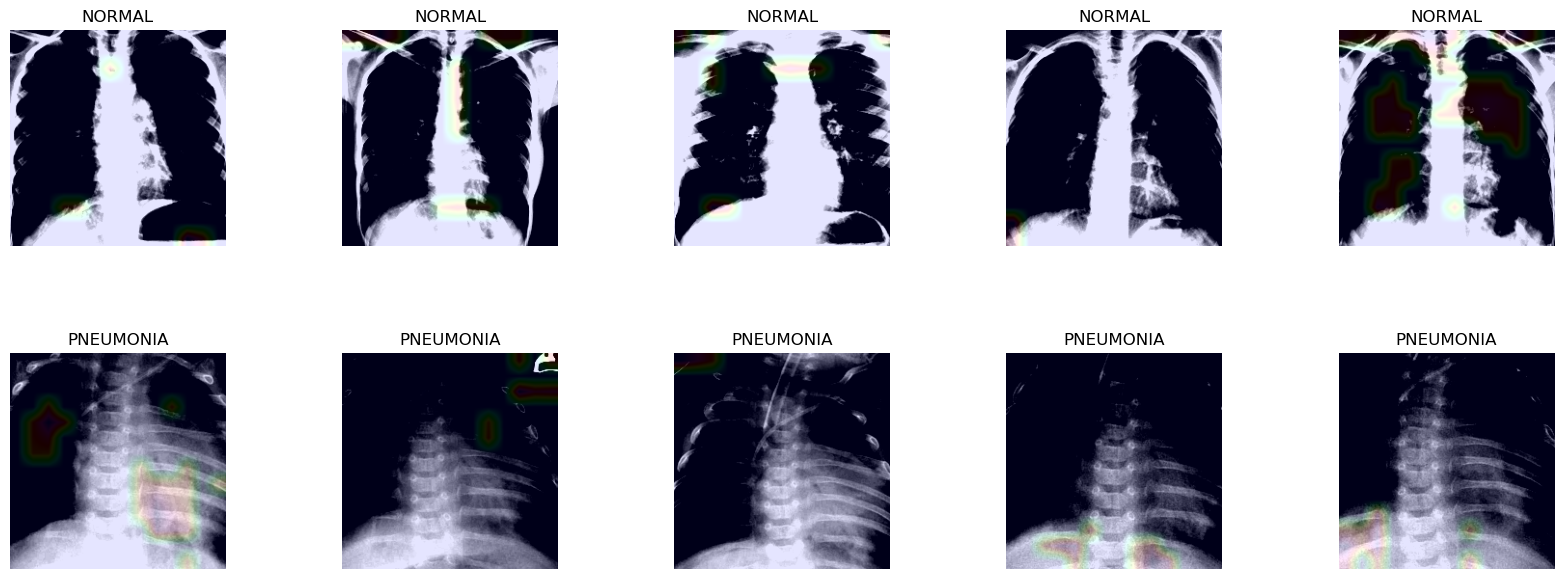

In [12]:
display_datasets_heatmap(grad_cam_model, dataloader_grad_cam, n=10)